  Using cached azureml_sdk-1.52.0-py3-none-any.whl (2.7 kB)
  Using cached azureml_core-1.52.0-py3-none-any.whl (3.3 MB)
  Using cached azureml_dataset_runtime-1.52.0-py3-none-any.whl (2.3 kB)
  Using cached azureml_train_core-1.52.0-py3-none-any.whl (8.6 MB)
  Using cached azureml_sdk-1.51.0-py3-none-any.whl (2.7 kB)
  Using cached azureml_core-1.51.0.post1-py3-none-any.whl (3.3 MB)
  Using cached azureml_dataset_runtime-1.51.0-py3-none-any.whl (2.3 kB)
  Using cached azureml_train_core-1.51.0-py3-none-any.whl (8.6 MB)
  Using cached azureml_sdk-1.50.0-py3-none-any.whl (2.7 kB)
  Using cached azureml_core-1.50.0-py3-none-any.whl (3.3 MB)
  Using cached azureml_dataset_runtime-1.50.0-py3-none-any.whl (2.3 kB)
  Using cached azureml_train_core-1.50.0-py3-none-any.whl (8.6 MB)
  Using cached azureml_sdk-1.49.0-py3-none-any.whl (2.7 kB)
  Using cached azureml_core-1.49.0-py3-none-any.whl (3.3 MB)
  Using cached azureml_dataset_runtime-1.49.0-py3-none-any.whl (2.3 kB)
  Using cached azurem

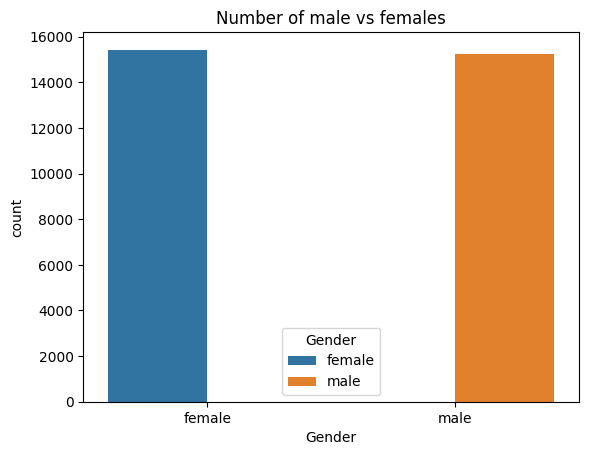

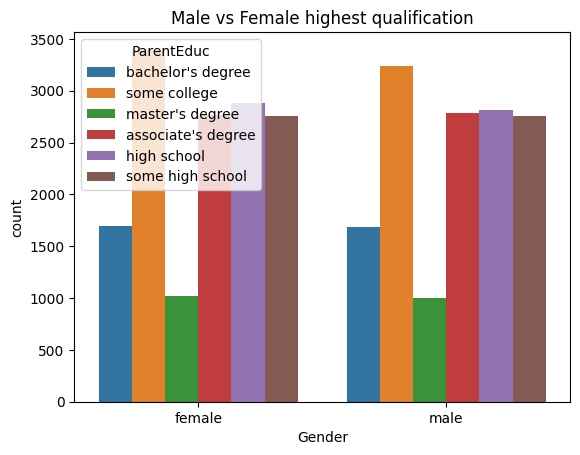

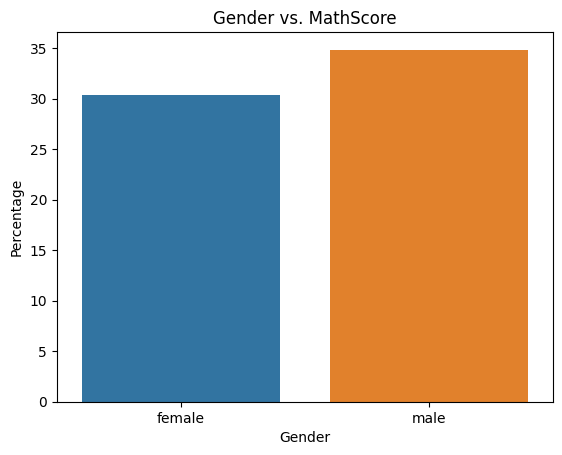

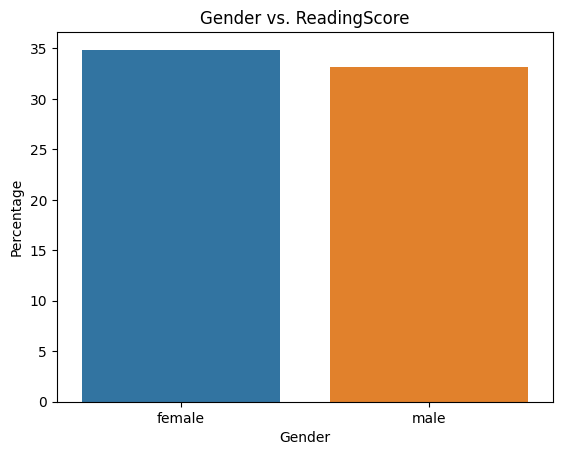

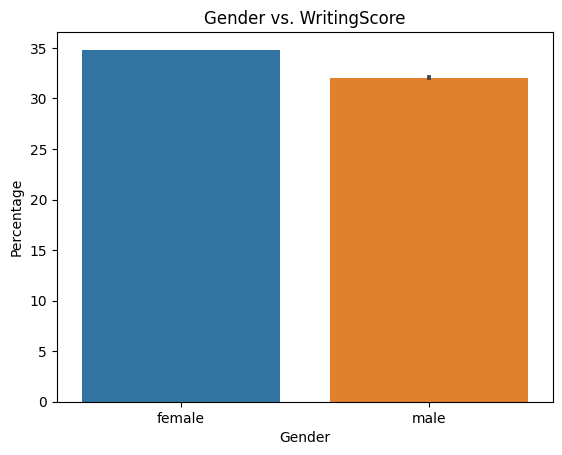

In [62]:
!pip3 install --upgrade azureml-sdk
!pip3 install openpyxl

!pip3 install pandas
import pandas as pd

!pip3 install numpy
import numpy as np
import pip

!pip3 install pydotplus
import pydotplus
from sklearn import preprocessing

!pip3 install scikit-learn
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

!pip3 install seaborn
import seaborn as sns
import scipy.stats as spy


import pydotplus
from IPython.display import Image 

from sklearn.preprocessing import LabelEncoder


import pandas as pd 
examscores = pd.read_csv('exam_scores.csv')

examscores.dropna(inplace=True)

encoder = LabelEncoder()

examscores.head()
examscores.tail()
examscores.columns

#information about the dataset columns
examscores.info()

print(examscores.head())

#Rename columns 
examscores.rename(columns={'Unnamed: 0':'no_name'}, inplace=True)
examscores.columns

examscores.describe()

examscores['Gender'].value_counts()


sns.countplot(x = 'Gender', data = examscores, hue = 'Gender')
plt.title('Number of male vs females')
plt.show()

sns.countplot(x = 'Gender',hue = 'ParentEduc',data = examscores)
plt.title('Male vs Female highest qualification')
plt.show()

# Calculate the sum of the three columns
column_sum = examscores['MathScore'] + examscores['ReadingScore'] + examscores['WritingScore']

# Calculate the percentages for each column
percentage_math = (examscores['MathScore'] / column_sum) * 100
percentage_reading = (examscores['ReadingScore'] / column_sum) * 100
percentage_writing = (examscores['WritingScore'] / column_sum) * 100

# Assign the calculated percentages to new columns in the DataFrame
examscores['PercentageMath'] = percentage_math
examscores['PercentageReading'] = percentage_reading
examscores['PercentageWriting'] = percentage_writing

# Check if the required columns exist
if all(col in examscores.columns for col in ['Gender', 'PercentageMath', 'PercentageReading', 'PercentageWriting']):
    # Plot for Gender vs. MathScore
    sns.barplot(x='Gender', y='PercentageMath', data = examscores)
    plt.title('Gender vs. MathScore')
    plt.xlabel('Gender')
    plt.ylabel('Percentage')
    plt.show()

    # Plot for Gender vs. ReadingScore
    sns.barplot(x='Gender', y='PercentageReading', data = examscores)
    plt.title('Gender vs. ReadingScore')
    plt.xlabel('Gender')
    plt.ylabel('Percentage')
    plt.show()

    # Plot for Gender vs. WritingScore
    sns.barplot(x='Gender', y='PercentageWriting', data = examscores)
    plt.title('Gender vs. WritingScore')
    plt.xlabel('Gender')
    plt.ylabel('Percentage')
    plt.show()
else:
    print("One or more required columns are missing.")

# Perform t-test to compare MathScores between males and females
t_statistic, p_value = spy.ttest_ind(examscores[examscores['Gender']=='male']['MathScore'],
                                     examscores[examscores['Gender']=='female']['MathScore'],
                                     equal_var=True)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("The difference in MathScores between males and females is statistically significant.")
else:
    print("There is no significant difference in MathScores between males and females.")

# Perform t-test to compare WritingScores between males and females
t_statistic, p_value = spy.ttest_ind(examscores[examscores['Gender']=='male']['WritingScore'],
                                     examscores[examscores['Gender']=='female']['WritingScore'],
                                     equal_var=True)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("The difference in WritingScores between males and females is statistically significant.")
else:
    print("There is no significant difference in WritingScores between males and females.")

# Perform t-test to compare ReadingScores between males and females
t_statistic, p_value = spy.ttest_ind(examscores[examscores['Gender']=='male']['ReadingScore'],
                                     examscores[examscores['Gender']=='female']['ReadingScore'],
                                     equal_var=True)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("The difference in ReadingScores between males and females is statistically significant.")
else:
    print("There is no significant difference in ReadingScores between males and females.")

if isinstance("female", float):
    print("The string is a number")
else:
    print("The string is not a number")

# Part 2 - Training and Evaluation

# Drop the gender and ethnic_group columns
examscores = examscores.drop('Gender', axis=1)
examscores = examscores.drop('EthnicGroup', axis=1)

# Convert the remaining string variables to numbers
encoder = LabelEncoder()
for column in examscores.columns:
    if examscores[column].dtype=='object':
        examscores[column] = encoder.fit_transform(examscores[column])

# Split the DataFrame into training and test sets
X_train, X_test, y_train, y_test = train_test_split(examscores, examscores['MathScore'], test_size=0.25)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Summarize the results
print("MSE:", mse)

import pandas as pd
import seaborn as sns


# Create a correlation matrix
correlation_matrix = examscores.corr()

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()